# Data Wrangling

## Scatter Plots

### Preliminaries

Okay so technically, this isn't data wrangling. It is data visualization. But it can help you see what is really going on.

In [4]:
import numpy as np
import pandas
import mysql.connector
import mysettings
import matplotlib.pyplot as plt
%matplotlib inline

First of all, we're going to get the data. Okay this isn't really "getting" the data. I'm going to generate a bunch of data. Two variables that are completely random, and there better be a ton of it. So let's do that.

In [2]:
x=np.random.normal(loc=10.0,scale=2.5,size=100000)
y=np.random.normal(loc=25.0,scale=10,size=100000)
df=pandas.DataFrame([x,y]).T
df.head()

,0,1
0,9.815370,21.369739
1,10.435005,22.182247
2,14.060668,42.911088
3,11.471115,28.225212
4,7.087795,39.397732


### Visualizing your Data
First let's take a look at the traditional scatter plot, and see what we can tell.

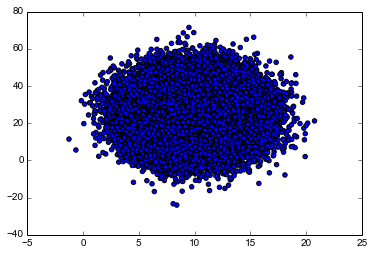

In [5]:
plt.scatter(df[0],df[1])
plt.show()

Okay so I get a big blob of data. I can't tell if there is any additional structure to it. It is too tightly packed. There seems to be some boundary point and then the data just fizzles out. So maybe it is more dense in the center but not in the outer edges. At this point there is no way to tell.

Let's try turning the transparency of individual data points way up. That might let us see what is going on in the middle of the blob. To turn the trasparency up you turn the alpha parameter way down.

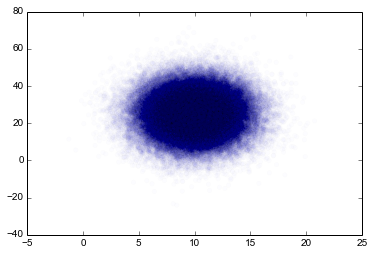

In [14]:
plt.scatter(df[0],df[1],alpha=0.01)
plt.show()

What are we going to do now? It didn't seem to work how we intended. We were hoping that we could uncover the hidden structure of the blob, but it is still just way too dense. Turning the transparency down just made me blob look fuzzy.

So what we're going to do is let's try binning the data. But binning data in 2d what shape do I use? rectangles? triangles? circles? Let's do hexagons. Why? They look like circles and they tesselate well. Circles are ideal because they give us equal distance from the center point. The problem is that circles leave us with gaps. So hexagons are a good compromise. They give us roughly equal distance from the center and leave no gaps.

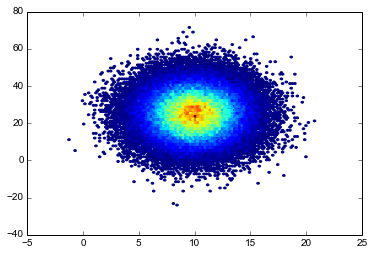

In [10]:
plt.hexbin(df[0],df[1],mincnt=1)
plt.xlim([-5,25])
plt.ylim([-40,80])
plt.show()

So this image shows us the detail that we wanted. The center is the most dense region, as indicated by the red, and it gets progressively less dense the further from the center that you go. It even looks like the edge points are shown very clearly. You can think of hexagonal binning as a form of 2d histogram.

Let's walk through the code, the first line just says give me a hexagonal bin plot. The mincnt parameter in the function is the minimum count necessary to change the color. So I said you need to have at least one otherwise just leave it as a whitespace. The rest of the code just makes the axis match the previous two figures, and then we display the result.

# If you liked this tutorial make sure to subscribe to my email list so that you can be the first to know when I post something new. You can do that at [BarnesAnalytics.com](http://www.barnesanalytics.com)